In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
sys.path.insert(0, "../func_py/")
import plot_utils as pl_ut
import data_utils as dt

Plotting statistics of the clonal families counts

In [2]:
metadata = pd.read_csv('metadata/metadata.tsv', sep='\t', index_col=0)
patients = set(metadata.patient)

### Clone size statistics of all the memory cells of a patient

In [4]:
counts_data = dict()
for _id, row in metadata.iterrows():
    if row.cell == 'mem':
        fr = pd.read_csv('sequences/'+_id+'.tsv', sep='\t', index_col='sequence_id')
        fr['count'] = 1
        counts_data[_id] = fr.groupby('family').agg({'count' : sum})['count']

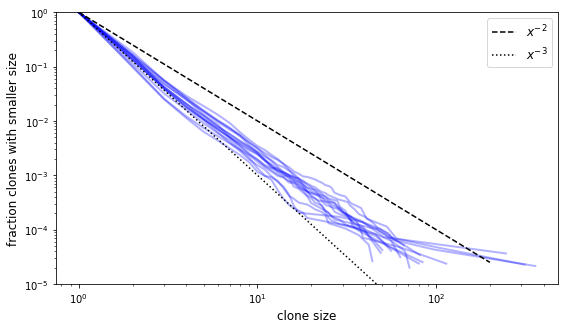

In [6]:
fig = plt.figure(figsize=(9,5))

plt.loglog()
plt.xlabel('clone size', fontsize=12)
plt.ylabel('fraction clones with smaller size', fontsize=12)
xs = np.linspace(1,200,20)

for _id in counts_data.keys():
    uni_counts, count_counts = np.unique(counts_data[_id].values, return_counts=True)
    if count_counts.sum() < 10000:
        continue
    uni_counts = uni_counts[np.argsort(uni_counts)]
    count_counts = count_counts[np.argsort(uni_counts)]
    cum = np.cumsum(count_counts[::-1])[::-1]
    plt.plot(uni_counts, cum/cum[0], c='b', alpha=0.3, lw=2)

#plt.plot(xs, count_cumcount_p[0]*xs**(-1), c='k', ls=':', label=r'$x^{-1}$')[]
plt.ylim(10**(-5),1)
plt.plot(xs, xs**(-2), c='k', ls='--', label=r'$x^{-2}$')
plt.plot(xs, xs**(-3), c='k', ls=':', label=r'$x^{-3}$')
plt.legend(fontsize=12)

#plt.savefig('plots/families/plaw_mem.png', dpi=200, facecolor='w')

### Clone size statistics of all the plasmablasts of a patient

In [7]:
counts_data = dict()
for _id, row in metadata.iterrows():
    if row.cell == 'pb':
        fr = pd.read_csv('sequences/'+_id+'.tsv', sep='\t', index_col='sequence_id')
        fr['count'] = 1
        counts_data[_id] = fr.groupby('family').agg({'count' : sum})['count']

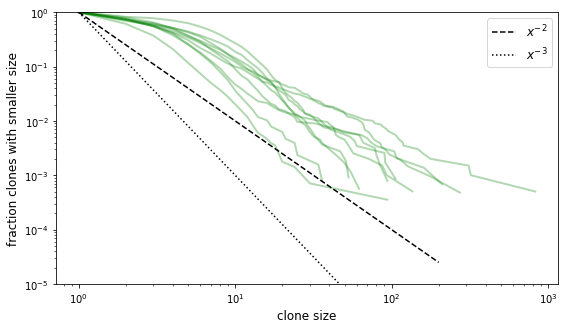

In [8]:
fig = plt.figure(figsize=(9,5))

plt.loglog()
plt.xlabel('clone size', fontsize=12)
plt.ylabel('fraction clones with smaller size', fontsize=12)
xs = np.linspace(1,200,20)

for _id in counts_data.keys():
    uni_counts, count_counts = np.unique(counts_data[_id].values, return_counts=True)
    if count_counts.sum() < 1000:
        continue
    uni_counts = uni_counts[np.argsort(uni_counts)]
    count_counts = count_counts[np.argsort(uni_counts)]
    cum = np.cumsum(count_counts[::-1])[::-1]
    plt.plot(uni_counts, cum/cum[0], c='g', alpha=0.3, lw=2)

#plt.plot(xs, count_cumcount_p[0]*xs**(-1), c='k', ls=':', label=r'$x^{-1}$')[]
plt.ylim(10**(-5),1)
plt.plot(xs, xs**(-2), c='k', ls='--', label=r'$x^{-2}$')
plt.plot(xs, xs**(-3), c='k', ls=':', label=r'$x^{-3}$')
plt.legend(fontsize=12)

#plt.savefig('plots/families/plaw_pb.png', dpi=200, facecolor='w')

### Scatter plot of counts between different samples

In [11]:
s1, s2 = 'IZ_t2_mem', 'IZ_t3_mem'


f1 = pd.read_csv('sequences/'+s1+'.tsv', sep='\t', index_col='sequence_id')
f1['count'] = 1
f2 = pd.read_csv('sequences/'+s2+'.tsv', sep='\t', index_col='sequence_id')
f2['count'] = 1
f1_aux = f1.groupby('family').agg({'count':sum})
f2_aux = f2.groupby('family').agg({'count':sum})
merged_counts = pd.merge(f1_aux, f2_aux, on='family', how='outer').fillna(0)
sparse_counts = dt.build_sparse_counts([merged_counts['count_x'], merged_counts['count_y']])

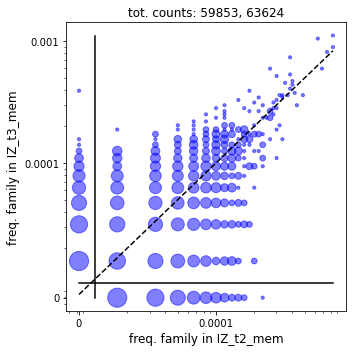

In [12]:
fig, ax = plt.subplots(figsize=(5,5))

ax = pl_ut.plot_scatter(ax, sparse_counts, s1, s2, 10, 400, False)
plt.tight_layout()
#plt.savefig('plots/families/'+s1+','+s2+'.png', dpi=200, facecolor='w')

### Correlation of delta log counts between memory and plasmablasts

In [14]:
sm1, sm2 = 'IZ_t2_mem', 'IZ_t3_mem'
sp1, sp2 = 'IZ_t2_pb', 'IZ_t3_pb'
fam_type = 'family'

fm1 = pd.read_csv('sequences/'+sm1+'.tsv', sep='\t', index_col='sequence_id')
fm1['count'] = 1
fm2 = pd.read_csv('sequences/'+sm2+'.tsv', sep='\t', index_col='sequence_id')
fm2['count'] = 1
fp1 = pd.read_csv('sequences/'+sp1+'.tsv', sep='\t', index_col='sequence_id')
fp1['count'] = 1
fp2 = pd.read_csv('sequences/'+sp2+'.tsv', sep='\t', index_col='sequence_id')
fp2['count'] = 1

In [21]:
fam_type = 'family'
fam_m1 = fm1.groupby(fam_type).agg({'count' : sum})
fam_m2 = fm2.groupby(fam_type).agg({'count' : sum})
merged_fr_m = fam_m1.merge(fam_m2, how='outer', on=fam_type)
merged_fr_m[merged_fr_m.isna()] = 0
merged_fr_m.index = np.array(merged_fr_m.index, dtype=int)

fam_p1 = fp1.groupby(fam_type).agg({'count' : sum})
fam_p2 = fp2.groupby(fam_type).agg({'count' : sum})
merged_fr_p = fam_p1.merge(fam_p2, how='outer', on=fam_type)
merged_fr_p[merged_fr_p.isna()] = 0
merged_fr_p.index = np.array(merged_fr_p.index, dtype=int)

no_zero_fams = set(merged_fr_m.index).intersection(set(merged_fr_p.index))
len(no_zero_fams)
merged_fr_m = merged_fr_m.loc[np.isin(merged_fr_m.index.values, list(no_zero_fams))]
merged_fr_p = merged_fr_p.loc[np.isin(merged_fr_p.index.values, list(no_zero_fams))]
mm, mp = merged_fr_m == 0, merged_fr_p == 0
merged_fr_m[mm] = 0.5
merged_fr_p[mp] = 0.5
merged_fr_m['log delta'] = np.log(merged_fr_m['count_x']) - np.log(merged_fr_m['count_y'])
merged_fr_p['log delta'] = np.log(merged_fr_p['count_x']) - np.log(merged_fr_p['count_y'])

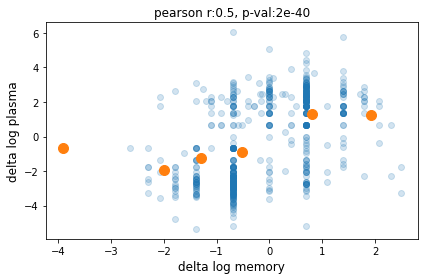

In [23]:
from scipy.stats import pearsonr, spearmanr

xs, ys = merged_fr_m['log delta'].values, merged_fr_p['log delta'].values
plt.scatter(xs, ys, alpha=0.2)
r, pval = pearsonr(xs, ys)
plt.title('pearson r:%.g, p-val:%.g'%(r, pval))

bins = np.linspace(min(xs), max(xs), 7)
sort_ids = np.argsort(xs)
xs = xs[sort_ids]
ys = ys[sort_ids]
xs_av = [np.mean(xs[np.logical_and(xs >= bins[i], xs < bins[i+1])]) for i in range(len(bins)-1)]
ys_av = [np.mean(ys[np.logical_and(xs >= bins[i], xs < bins[i+1])]) for i in range(len(bins)-1)]
plt.scatter(xs_av, ys_av, s=100)

#plt.xlim(-3.2, 2.2)
#plt.ylim(-4, 3)
plt.xlabel('delta log memory', fontsize=12)
plt.ylabel('delta log plasma', fontsize=12)

plt.tight_layout()
#plt.savefig('plots/corr_delta_logs.png', dpi=200)